In [1]:
import datatable as dt
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rename = {}
idx = 0
for i in os.listdir('.'):
    if i[:3]=='GSM' and i[-3:]=='bed' and i.find('Blood')!=-1:
        rename[idx] = {}
        rename[idx]['ID'] = i.split('_')[0]
        rename[idx]["type"] = i.split('Blood-')[1].split('-')[0]
        idx+=1

In [3]:
type = {}
idx = 0
for i in pd.DataFrame(rename).T['type'].unique():
    type[i] = idx
    idx +=1 
type

{'T': 0, 'NK': 1, 'Monocytes': 2, 'Granulocytes': 3, 'B': 4}

In [4]:
df = pd.read_table("./Blood.metilene.chr2x.input", header=None, skiprows=3)
df.columns = 'chrom	pos'.split('\t')+list(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'])
df

,chrom,pos,0_GSM5652277,0_GSM5652278,0_GSM5652279,0_GSM5652280,0_GSM5652281,0_GSM5652282,0_GSM5652283,0_GSM5652284,...,2_GSM5652303,2_GSM5652304,3_GSM5652313,3_GSM5652314,3_GSM5652315,4_GSM5652316,4_GSM5652317,4_GSM5652318,4_GSM5652319,4_GSM5652320
0,chr2,10380,1.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,chr2,10386,1.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,chr2,10392,1.0,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr2,10399,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr2,10406,NaN,NaN,0.909091,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460927,chr22,51244283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.846154,NaN,NaN
3460928,chr22,51244290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.916667,NaN,NaN
3460929,chr22,51244299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.909091,NaN,NaN
3460930,chr22,51244307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [18]:
df.columns.str.contains('0_').sum(),df.columns.str.contains('1_').sum(),df.columns.str.contains('2_').sum(),df.columns.str.contains('3_').sum(),df.columns.str.contains('4_').sum(),

(22, 3, 3, 3, 5)

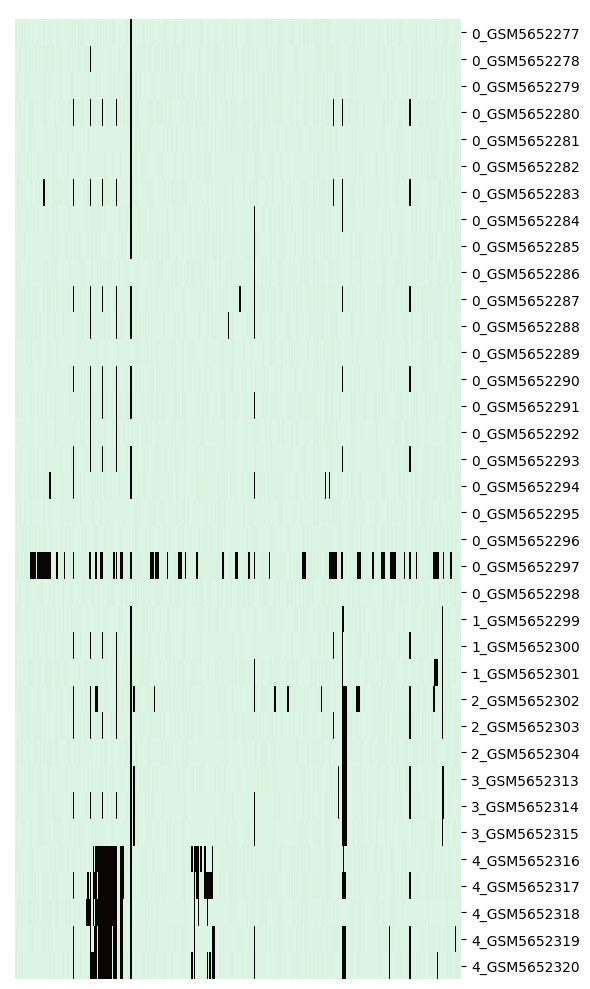

In [5]:
# 3261322	3261610
cm = sns.clustermap(1*df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)].fillna(100)\
               [list(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'])].T,\
               cmap='mako_r', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)
# cm.fig.suptitle('pub') 

In [6]:
df.dropna().to_csv('./Blood.metilene.chr2x.noNA.input',sep='\t',index=False, float_format='%.3f')

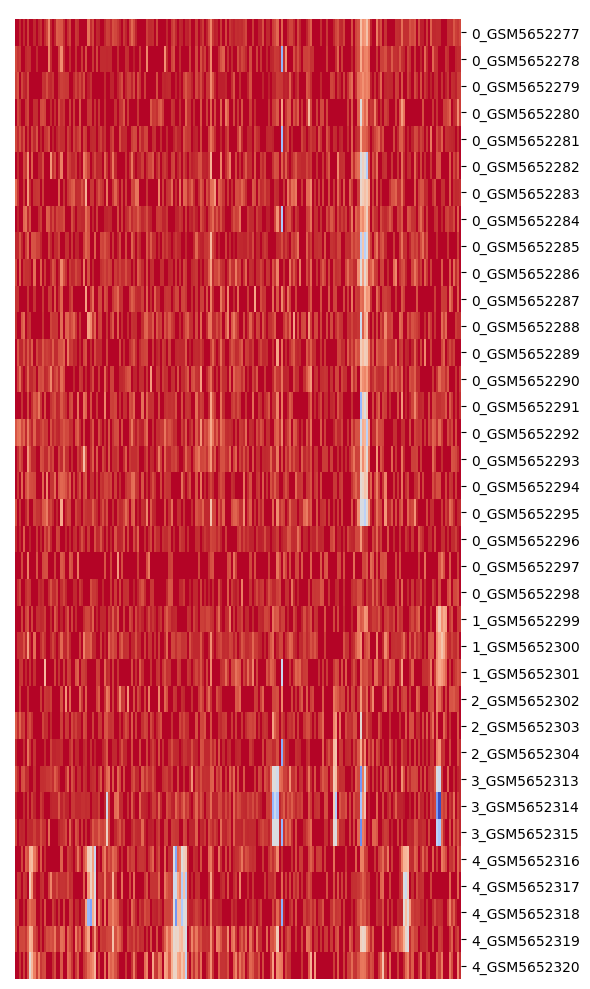

In [7]:
# 3261322	3261610
cm = sns.clustermap(1*df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)].dropna()\
               [list(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'])].T,\
               cmap='coolwarm', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)
# cm.fig.suptitle('pub') 

In [8]:
means = {}
for i in type.values():
    means[str(i)] = df[df.columns[df.columns.str.contains(str(i)+'_')]].T.mean()

for i in list(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID']):
    df[i] = df[i].fillna(means[i.split('_')[0]])

df = df.fillna(0.5)
df.to_csv('./Blood.metilene.chr2x.fillNA.input',sep='\t',index=False, float_format='%.3f')
df

,chrom,pos,0_GSM5652277,0_GSM5652278,0_GSM5652279,0_GSM5652280,0_GSM5652281,0_GSM5652282,0_GSM5652283,0_GSM5652284,...,2_GSM5652303,2_GSM5652304,3_GSM5652313,3_GSM5652314,3_GSM5652315,4_GSM5652316,4_GSM5652317,4_GSM5652318,4_GSM5652319,4_GSM5652320
0,chr2,10380,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.5,0.5,0.5,0.5,0.5,1.000000,1.000000,1.000000,1.000000,1.000000
1,chr2,10386,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.5,0.5,0.5,0.5,0.5,1.000000,1.000000,1.000000,1.000000,1.000000
2,chr2,10392,1.000000,0.984848,1.000000,0.984848,0.984848,0.984848,0.984848,0.984848,...,0.5,0.5,0.5,0.5,0.5,0.500000,0.500000,0.500000,0.500000,0.500000
3,chr2,10399,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.5,0.5,0.5,0.5,0.5,0.500000,0.500000,0.500000,0.500000,0.500000
4,chr2,10406,0.954545,0.954545,0.909091,0.954545,0.954545,0.954545,0.954545,0.954545,...,0.5,0.5,0.5,0.5,0.5,0.500000,0.500000,0.500000,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460927,chr22,51244283,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.5,0.5,0.5,0.5,0.5,0.846154,0.846154,0.846154,0.846154,0.846154
3460928,chr22,51244290,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.5,0.5,0.5,0.5,0.5,0.916667,0.916667,0.916667,0.916667,0.916667
3460929,chr22,51244299,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.5,0.5,0.5,0.5,0.5,0.909091,0.909091,0.909091,0.909091,0.909091
3460930,chr22,51244307,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.5,0.5,0.5,0.5,0.5,1.000000,1.000000,1.000000,1.000000,1.000000


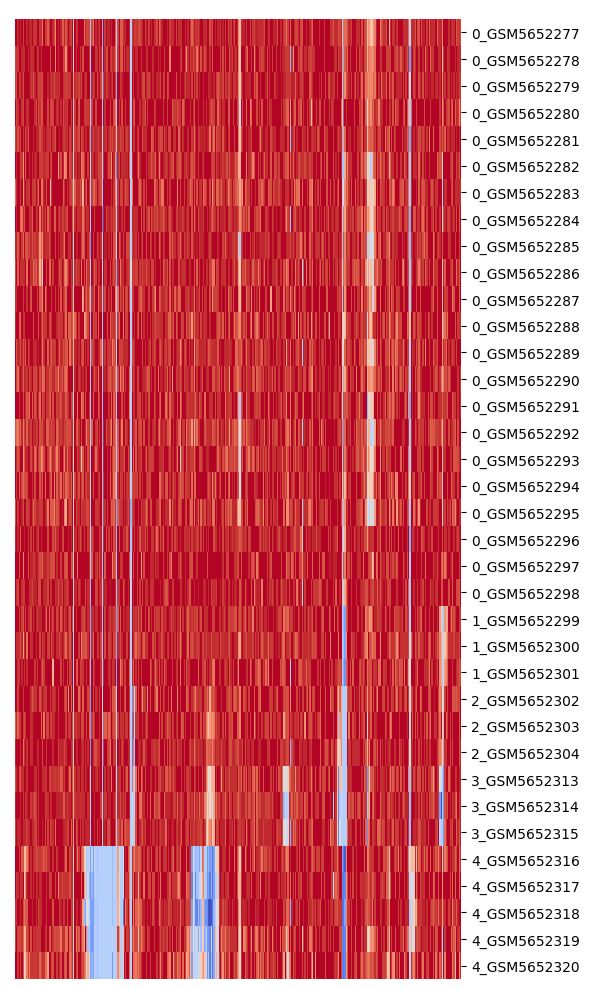

In [9]:
# 3261322	3261610
cm = sns.clustermap(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)].dropna()\
               [list(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'])].T,\
               cmap='coolwarm', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)
# cm.fig.suptitle('pub') 

In [10]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

(215, 38)
0 12.0 0,2|3
1 28.0 1|0,4
2 43.0 0|1,2,4
3 53.0 2,3|4
4 54.0 0,2,3|4
5 57.0 0,1,2,3|4


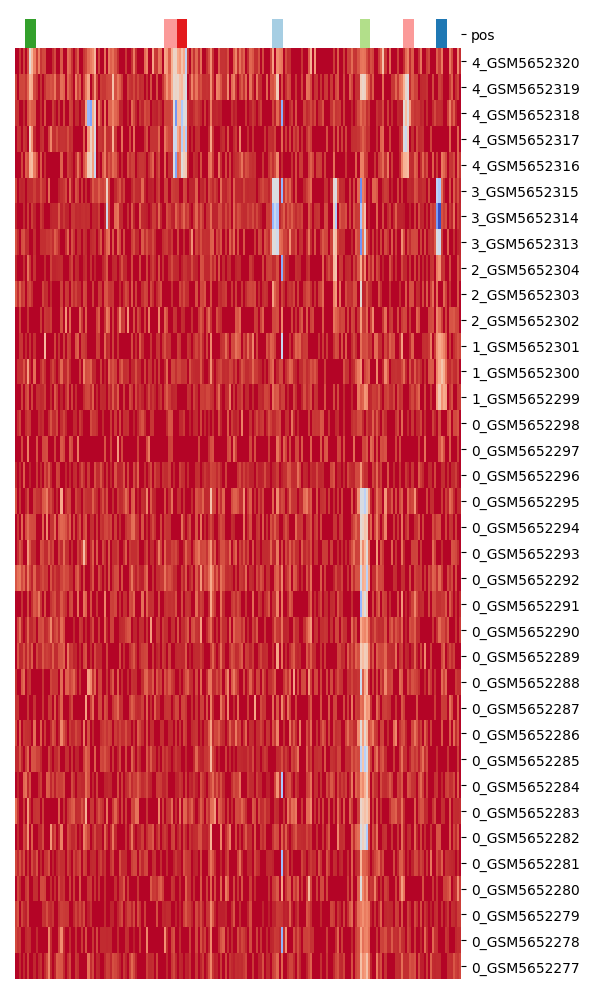

In [11]:
param_m = '.m5'
param_NA = 'noNA'

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

df = pd.read_table('./Blood.metilene.chr2x.'+param_NA+'.input')
print(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)].shape)

DMR_ids = sorted(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]['pos'].map(inDMRs).dropna().unique())

cDMRs = {}
for i in range(len(DMR_ids)):
    print(i, DMR_ids[i], id_convert[DMR_ids[i]])
    cDMRs[DMR_ids[i]] = sns.color_palette("Paired")[i]
    

cm = sns.clustermap(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\
               col_colors=df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]['pos'].map(inDMRs).map(cDMRs),\
               cmap='coolwarm', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

(215, 38)
0 57.0 0,1,2,3|4


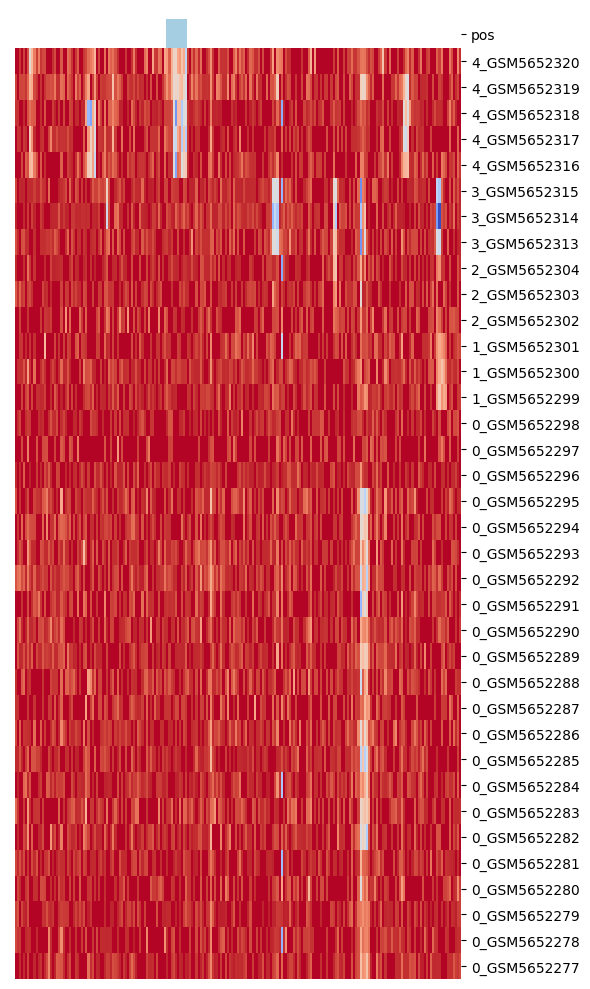

In [12]:
param_m = ''
param_NA = 'noNA'

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

df = pd.read_table('./Blood.metilene.chr2x.'+param_NA+'.input')
print(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)].shape)

DMR_ids = sorted(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]['pos'].map(inDMRs).dropna().unique())

cDMRs = {}
for i in range(len(DMR_ids)):
    print(i, DMR_ids[i], id_convert[DMR_ids[i]])
    cDMRs[DMR_ids[i]] = sns.color_palette("Paired")[i]
    

cm = sns.clustermap(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\
               col_colors=df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]['pos'].map(inDMRs).map(cDMRs),\
               cmap='coolwarm', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

(344, 38)
0 15.0 0,1,2|3
1 20.0 0|2,3
2 24.0 0|1,2,3
3 34.0 0,1,2|4
4 53.0 2,3|4
5 54.0 0,2,3|4
6 57.0 0,1,2,3|4
7 85.0 0|2,3,4
8 89.0 0|1,2,3,4


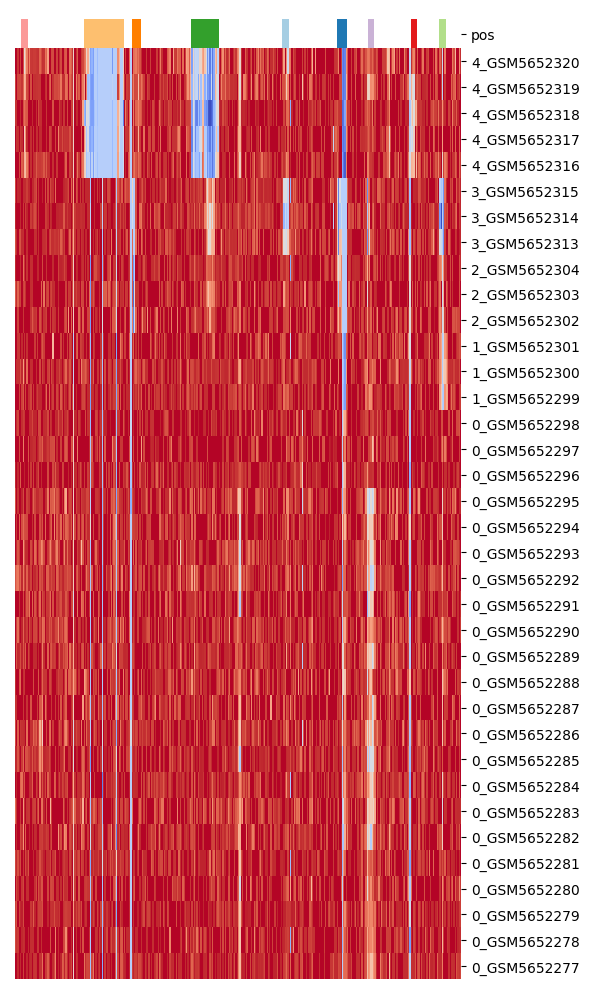

In [13]:
param_m = '.m5'
param_NA = 'fillNA'

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

df = pd.read_table('./Blood.metilene.chr2x.'+param_NA+'.input')
print(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)].shape)

DMR_ids = sorted(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]['pos'].map(inDMRs).dropna().unique())

cDMRs = {}
for i in range(len(DMR_ids)):
    print(i, DMR_ids[i], id_convert[DMR_ids[i]])
    cDMRs[DMR_ids[i]] = sns.color_palette("Paired")[i]
    

cm = sns.clustermap(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\
               col_colors=df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]['pos'].map(inDMRs).map(cDMRs),\
               cmap='coolwarm', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

(344, 38)
0 20.0 0|2,3
1 34.0 0,1,2|4
2 49.0 1,3|0,4
3 57.0 0,1,2,3|4


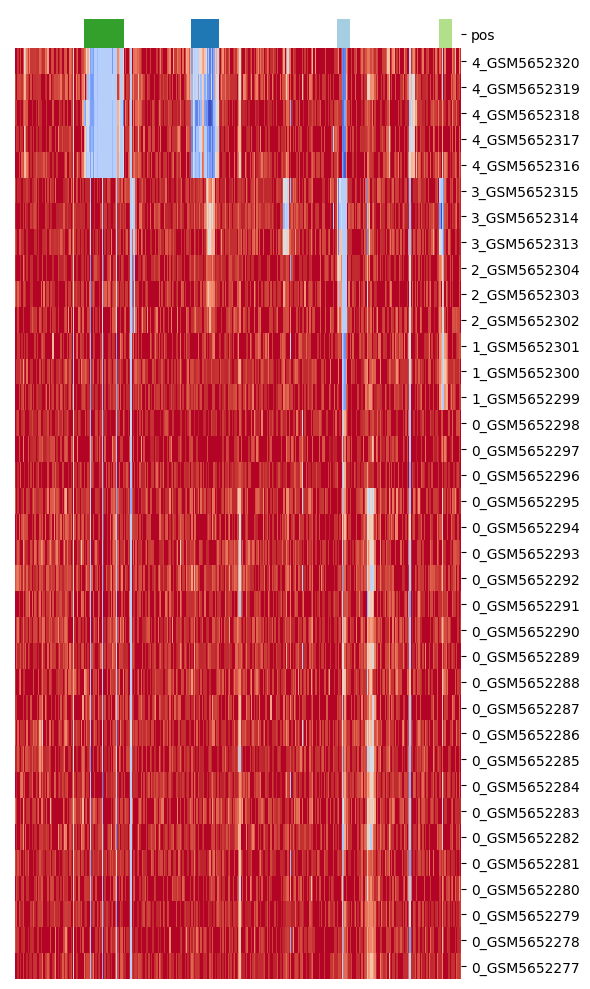

In [14]:
param_m = ''
param_NA = 'fillNA'

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

df = pd.read_table('./Blood.metilene.chr2x.'+param_NA+'.input')
print(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)].shape)

DMR_ids = sorted(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]['pos'].map(inDMRs).dropna().unique())

cDMRs = {}
for i in range(len(DMR_ids)):
    print(i, DMR_ids[i], id_convert[DMR_ids[i]])
    cDMRs[DMR_ids[i]] = sns.color_palette("Paired")[i]
    

cm = sns.clustermap(df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]\
               [sorted(pd.DataFrame(rename).T['type'].map(type).astype(str)+'_'+pd.DataFrame(rename).T['ID'], reverse=True)].T,\
               col_colors=df.loc[(df['chrom']=='chr2')&(df['pos']>= 3255001)&(df['pos']<=3273001)]['pos'].map(inDMRs).map(cDMRs),\
               cmap='coolwarm', figsize=[6,10], method='ward', dendrogram_ratio=0.01, xticklabels=False, col_cluster=False, row_cluster=False)
cm.cax.set_visible(False)

In [78]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4A')
unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))].groupby('Type').count()[['chr']]

,chr
Type,
Blood-Mono+Macro,2
Blood-NK,2


In [79]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4B')
unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))].groupby('Type').count()[['chr']]

,chr
Type,
Blood-B,21
Blood-Granul,20
Blood-Mono+Macro,21
Blood-NK,20
Blood-T,14


In [80]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4C')
unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))].groupby('Type').count()[['chr']]

,chr
Type,
Blood-B,72
Blood-Granul,79
Blood-Mono+Macro,75
Blood-NK,92
Blood-T,69


In [110]:
param_m = '.m5'
param_NA = 'fillNA'

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

In [111]:
len(set.intersection(set(df['pos']),set(inDMRs.keys())))/len(df['pos'])

0.1978802241708303

In [112]:
DMRs[['mwu','p']].T.min().sort_values()

31698    2.427600e-198
10880    1.818800e-194
14933    4.078100e-166
62743    3.141500e-155
32575    1.798500e-149
             ...      
42473     4.830900e-02
12013     4.839900e-02
6646      4.863700e-02
33023     4.959100e-02
17127     4.967000e-02
Length: 65012, dtype: float64

In [113]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4A')

unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
inUMs = {}
for i in unmethyl_blood_chr2.index:
    for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
        inUMs[j] = unmethyl_blood_chr2['Type'][i]

cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
cmp['publication'] = cmp[0].map(inUMs)

cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
pd.DataFrame(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

,0
publication,
Blood-Mono+Macro,1.0
Blood-NK,1.0


In [114]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4B')

unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
inUMs = {}
for i in unmethyl_blood_chr2.index:
    for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
        inUMs[j] = unmethyl_blood_chr2['Type'][i]

cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
cmp['publication'] = cmp[0].map(inUMs)

cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
pd.DataFrame(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

,0
publication,
Blood-B,0.929461
Blood-Granul,0.916318
Blood-Mono+Macro,0.970930
Blood-NK,0.951923
Blood-T,0.949495


In [115]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4C')

unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
inUMs = {}
for i in unmethyl_blood_chr2.index:
    for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
        inUMs[j] = unmethyl_blood_chr2['Type'][i]

cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
cmp['publication'] = cmp[0].map(inUMs)

cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
pd.DataFrame(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

,0
publication,
Blood-B,0.935047
Blood-Granul,0.859585
Blood-Mono+Macro,0.746212
Blood-NK,0.920897
Blood-T,0.679191


In [116]:
param_m = ''
param_NA = 'fillNA'

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

KeyboardInterrupt: 

In [ ]:
len(set.intersection(set(df['pos']),set(inDMRs.keys())))/len(df['pos'])

In [ ]:
DMRs[['mwu','p']].T.min().sort_values()

In [ ]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4A')

unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
inUMs = {}
for i in unmethyl_blood_chr2.index:
    for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
        inUMs[j] = unmethyl_blood_chr2['Type'][i]

cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
cmp['publication'] = cmp[0].map(inUMs)

cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
pd.DataFrame(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

In [ ]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4B')

unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
inUMs = {}
for i in unmethyl_blood_chr2.index:
    for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
        inUMs[j] = unmethyl_blood_chr2['Type'][i]

cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
cmp['publication'] = cmp[0].map(inUMs)

cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
pd.DataFrame(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

In [ ]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4C')

unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
inUMs = {}
for i in unmethyl_blood_chr2.index:
    for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
        inUMs[j] = unmethyl_blood_chr2['Type'][i]

cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
cmp['publication'] = cmp[0].map(inUMs)

cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
pd.DataFrame(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

In [116]:
param_m = '.m5'
param_NA = 'noNA'

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

KeyboardInterrupt: 

In [ ]:
len(set.intersection(set(df['pos']),set(inDMRs.keys())))/len(df['pos'])

In [ ]:
DMRs[['mwu','p']].T.min().sort_values()

In [ ]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4A')

unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
inUMs = {}
for i in unmethyl_blood_chr2.index:
    for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
        inUMs[j] = unmethyl_blood_chr2['Type'][i]

cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
cmp['publication'] = cmp[0].map(inUMs)

cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
pd.DataFrame(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

In [ ]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4B')

unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
inUMs = {}
for i in unmethyl_blood_chr2.index:
    for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
        inUMs[j] = unmethyl_blood_chr2['Type'][i]

cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
cmp['publication'] = cmp[0].map(inUMs)

cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
pd.DataFrame(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

In [ ]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4C')

unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
inUMs = {}
for i in unmethyl_blood_chr2.index:
    for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
        inUMs[j] = unmethyl_blood_chr2['Type'][i]

cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
cmp['publication'] = cmp[0].map(inUMs)

cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
pd.DataFrame(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

In [116]:
param_m = ''
param_NA = 'noNA'

DMRs = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', skiprows=90)
id_convert = {}
Predictions_anno = pd.read_table('../metilene_output/Blood.metilene'+param_m+'.chr2x.'+param_NA+'.output', encoding='iso-8859-1', sep='@', header=None).head(90)
for i in Predictions_anno.index:
    id_convert[int(Predictions_anno.loc[i][0].split(':')[0].split('Combination ')[1])] = \
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[0]+'|'+\
    Predictions_anno.loc[i][0].split('Group A subgroups: ')[1].split(',	Group B subgroups: ')[1][:-1]
    
DMRs = DMRs.loc[(DMRs['chr'] =='chr2')&(DMRs['p']<0.05)]
inDMRs = {}
inDMRs2 = {}
for i in DMRs.index:
    for j in range(int(DMRs['start'][i])+1, int(DMRs['stop'][i]+1)):
        inDMRs[j] = DMRs['sig.comparison'][i]
        inDMRs2[j] = DMRs['p'][i]

KeyboardInterrupt: 

In [ ]:
len(set.intersection(set(df['pos']),set(inDMRs.keys())))/len(df['pos'])

In [ ]:
DMRs[['mwu','p']].T.min().sort_values()

In [ ]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4A')

unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
inUMs = {}
for i in unmethyl_blood_chr2.index:
    for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
        inUMs[j] = unmethyl_blood_chr2['Type'][i]

cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
cmp['publication'] = cmp[0].map(inUMs)

cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
pd.DataFrame(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

In [ ]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4B')

unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
inUMs = {}
for i in unmethyl_blood_chr2.index:
    for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
        inUMs[j] = unmethyl_blood_chr2['Type'][i]

cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
cmp['publication'] = cmp[0].map(inUMs)

cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
pd.DataFrame(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())

In [ ]:
unmethyl = pd.read_excel('./41586_2022_5580_MOESM4_ESM.xlsx', skiprows=2, sheet_name='Table S4C')

unmethyl_blood_chr2 = unmethyl.loc[(unmethyl['chr']=='chr2')&(unmethyl['Type'].str.contains('Blood'))]
inUMs = {}
for i in unmethyl_blood_chr2.index:
    for j in range(int(unmethyl_blood_chr2['start'][i])+1, int(unmethyl_blood_chr2['end'][i]+1)):
        inUMs[j] = unmethyl_blood_chr2['Type'][i]

cmp = pd.DataFrame(sorted(set.intersection(set(list(inDMRs.keys())+list(inUMs.keys())),set(df['pos']))))
cmp['metilene'] = cmp[0].map(inDMRs).map(id_convert)
cmp['publication'] = cmp[0].map(inUMs)

cmp2 = pd.crosstab(cmp['metilene'], cmp['publication'])
pd.DataFrame(cmp2.sum()/pd.crosstab(cmp['publication'],cmp['publication']).sum())